In [12]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

In [2]:
#exercice 1

# Définir la matrice de transition
P = np.array([
    [1/2, 0, 1/2, 0, 0],
    [1/4, 1/2, 1/4, 0, 0],
    [1/2, 0, 1/2, 0, 0],
    [0, 0, 0, 1/2, 1/2],
    [0, 0, 0, 1/2, 1/2]
])

# Calculer la limite de la puissance n de la matrice de transition lorsque n -> ∞
def matrix_power_limit(P, n):
    P_n = np.linalg.matrix_power(P, n)
    return P_n

# Choisir un grand nombre pour n
n_large = 1000
P_limit = matrix_power_limit(P, n_large)

print("\nLimite de la matrice de transition lorsque n -> ∞ :")
print(P_limit)


Limite de la matrice de transition lorsque n -> ∞ :
[[5.00000000e-001 0.00000000e+000 5.00000000e-001 0.00000000e+000
  0.00000000e+000]
 [5.00000000e-001 9.33263619e-302 5.00000000e-001 0.00000000e+000
  0.00000000e+000]
 [5.00000000e-001 0.00000000e+000 5.00000000e-001 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 5.00000000e-001
  5.00000000e-001]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 5.00000000e-001
  5.00000000e-001]]


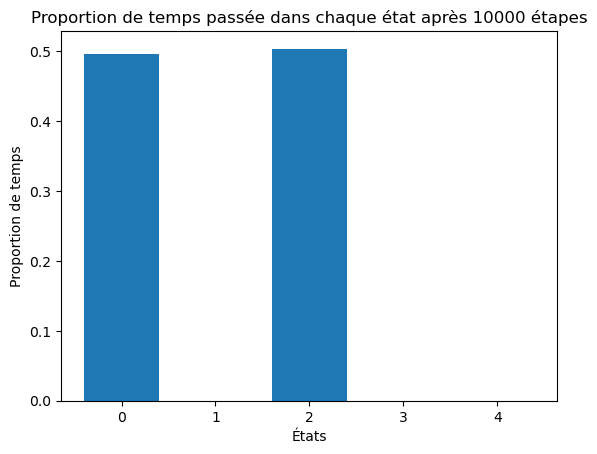

Proportions de temps passées dans chaque état :
État 0: 0.4964
État 1: 0.0000
État 2: 0.5036
État 3: 0.0000
État 4: 0.0000


In [13]:
npr.seed(123)
n_etape = 10000 # de la simulation

# Initialiser l'état de départ (choisi uniformément)
etats = [0, 1, 2, 3, 4]
etat_actuel = np.random.choice(etats)

# Stocker les visites de chaque état
visites = np.zeros(len(etats))

# Simuler la chaîne de Markov
for _ in range(n_etape):
    visites[etat_actuel] += 1
    etat_actuel = np.random.choice(etats, p=P[etat_actuel])

# Calculer les proportions de temps passées dans chaque état
proportions = visites / n_etape

# Afficher les résultats
plt.bar(etats, proportions)
plt.xlabel('États')
plt.ylabel('Proportion de temps')
plt.title('Proportion de temps passée dans chaque état après {} étapes'.format(n_etape))
plt.show()

print("Proportions de temps passées dans chaque état :")
for etat, proportion in zip(etats, proportions):
    print(f"État {etat}: {proportion:.4f}")

In [ ]:
##Autre methode
X=[]
x=0
for i in range(n_etape):
    x = 
    

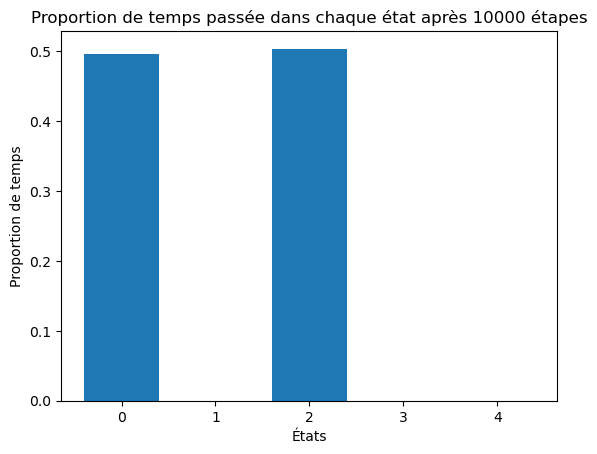

Proportions de temps passées dans chaque état :
État 0: 0.4964
État 1: 0.0000
État 2: 0.5036
État 3: 0.0000
État 4: 0.0000


In [17]:
##Autre methode
import numpy as np
import matplotlib.pyplot as plt

# Fixer la graine pour la reproductibilité
np.random.seed(123)

# Matrice de transition
P = np.array([
    [1/2, 0, 1/2, 0, 0],
    [1/4, 1/2, 1/4, 0, 0],
    [1/2, 0, 1/2, 0, 0],
    [0, 0, 0, 1/2, 1/2],
    [0, 0, 0, 1/2, 1/2]
])

# Paramètres de la simulation
n_etape = 10000
etats = [0, 1, 2, 3, 4]
etat_actuel = np.random.choice(etats)

# Stocker les visites de chaque état
visites = np.zeros(len(etats))

# Simuler la chaîne de Markov en utilisant uniquement des if
for _ in range(n_etape):
    visites[etat_actuel] += 1  # Enregistrer la visite à l'état actuel
    
    # Tirer un nombre aléatoire pour choisir la transition
    u = np.random.uniform(0, 1)
    
    # Déterminer l'état suivant avec des conditions `if`
    if etat_actuel == 0:
        if u < 1/2:
            etat_actuel = 0
        else:
            etat_actuel = 2
    elif etat_actuel == 1:
        if u < 1/4:
            etat_actuel = 0
        elif u < 3/4:
            etat_actuel = 1
        else:
            etat_actuel = 2
    elif etat_actuel == 2:
        if u < 1/2:
            etat_actuel = 0
        else:
            etat_actuel = 2
    elif etat_actuel == 3:
        if u < 1/2:
            etat_actuel = 3
        else:
            etat_actuel = 4
    elif etat_actuel == 4:
        if u < 1/2:
            etat_actuel = 3
        else:
            etat_actuel = 4

# Calculer les proportions de temps passées dans chaque état
proportions = visites / n_etape

# Afficher les résultats sous forme d'histogramme
plt.bar(etats, proportions)
plt.xlabel('États')
plt.ylabel('Proportion de temps')
plt.title('Proportion de temps passée dans chaque état après {} étapes'.format(n_etape))
plt.show()

# Afficher les proportions sous forme de texte
print("Proportions de temps passées dans chaque état :")
for etat, proportion in zip(etats, proportions):
    print(f"État {etat}: {proportion:.4f}")

    

In [15]:

# Choisir n (taille de la trajectoire) et N (taille de l'échantillon)
n = 1000
N = 1000


etat_depart = 0

# Simuler N trajectoires de longueur n
trajectoires = np.zeros((N, n+1), dtype=int)
trajectoires[:, 0] = etat_depart

for i in range(N):
    for j in range(1, n+1):
        trajectoires[i, j] = np.random.choice([0, 1, 2, 3, 4], p=P[trajectoires[i, j-1]])

# Calculer les fréquences des états à l'étape n
frequences = np.zeros(5)
for i in range(5):
    frequences[i] = np.sum(trajectoires[:, n] == i) / N

# Calculer la limite de la matrice de transition lorsque n -> ∞
def limite_puissance_matrice(P, n):
    P_n = np.linalg.matrix_power(P, n)
    return P_n

# Choisir un grand nombre pour n
n_grand = 1000
P_limite = limite_puissance_matrice(P, n_grand)





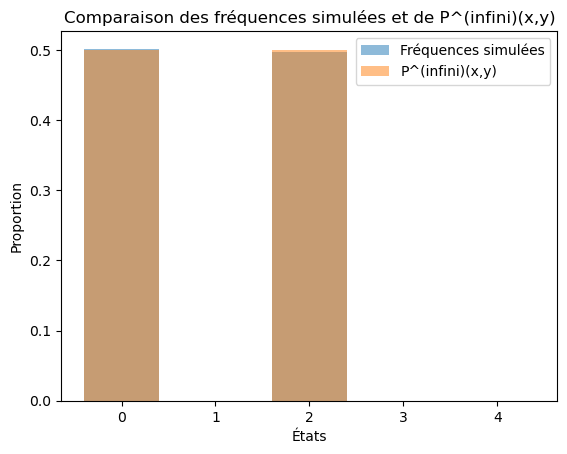

Fréquences simulées des états à l'étape n :
État 0: 0.5020
État 1: 0.0000
État 2: 0.4980
État 3: 0.0000
État 4: 0.0000

P^(infini)(x,y) :
État 0: 0.5000
État 1: 0.0000
État 2: 0.5000
État 3: 0.0000
État 4: 0.0000


In [5]:
# Afficher les résultats
etats = [0, 1, 2, 3, 4]
plt.bar(etats, frequences, alpha=0.5, label='Fréquences simulées')
plt.bar(etats, P_limite[etat_depart], alpha=0.5, label='P^(infini)(x,y)')
plt.xlabel('États')
plt.ylabel('Proportion')
plt.title('Comparaison des fréquences simulées et de P^(infini)(x,y)')
plt.legend()
plt.show()

print("Fréquences simulées des états à l'étape n :")
for etat, freq in zip(etats, frequences):
    print(f"État {etat}: {freq:.4f}")

print("\nP^(infini)(x,y) :")
for etat, prob in zip(etats, P_limite[etat_depart]):
    print(f"État {etat}: {prob:.4f}")


In [16]:
##exercice 2

P1 = np.array([
    [1, 0, 0, 0, 0],
    [1/2, 0, 1/2, 0, 0],
    [0, 1/2, 0, 1/2, 0],
    [0, 0, 1/2, 0, 1/2],
    [0, 0, 0, 0, 1]])

In [17]:
print(P1)

[[1.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0. ]
 [0.  0.5 0.  0.5 0. ]
 [0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  1. ]]


In [21]:
 def markov_avec_P(n,P,x0):
        X=np.zeros(n,dtype=np.int) #on indique que X contiendra seulement des entiers.
        X[0]=x0
        for k in range(n-1):
            X[k+1]=np.random.choice(a=range(len(P)), p=P[X[k],:])
        # Les états sont numérotés de 0à len(P)-1
        return X

 

In [22]:
n = 1000

markov_avec_P(n,P1,2)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations